## Observations and Insights

## Dependencies and starter code

1.)Capomulin was the most used drug to treat the tumors in the rats, which may be why there are so many more results and tumor volumes to average. 
2.) Capomulin had the overall lowest average tumor size after reviewing the study results
3.) There were more male mice use in this study versus female mice 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sp
import numpy as np 
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
complete_data = pd.merge(study_results, mouse_metadata, on='Mouse ID', how = "left")
complete_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen
#SEM = standard error of mean
mean_df = complete_data.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']

median_df = complete_data.groupby('Drug Regimen').median()['Tumor Volume (mm3)']

variance_df = complete_data.groupby('Drug Regimen').var()['Tumor Volume (mm3)']

standard_deviation_df = complete_data.groupby('Drug Regimen').std()['Tumor Volume (mm3)']

standard_error_of_mean = complete_data.groupby('Drug Regimen').sem()['Tumor Volume (mm3)'] 

summary_statistics_df = pd.DataFrame({"Mean Tumor":mean_df,"Median Tumor": median_df,"Variance Tumor":variance_df, \
                                      "Standard Deviation Tumor":standard_deviation_df,"Standard Error of Mean Tumor":standard_error_of_mean})
summary_statistics_df.head()

,Mean Tumor,Median Tumor,Variance Tumor,Standard Deviation Tumor,Standard Error of Mean Tumor
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar plots

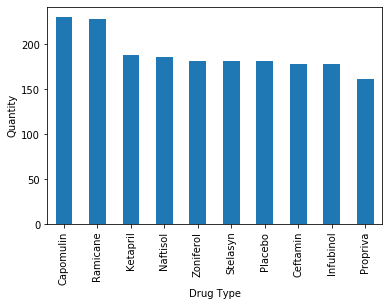

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
# Generate a bar plot using a Pandas's `DataFrame.plot()` that shows the number of data points for each treatment regimen.

drug_count = complete_data['Drug Regimen'].value_counts()
#plt.bar(drug_count.index.values, drug_count.values, color='r', alpha=0.8, align="center")
drug_count.plot(kind="bar")
plt.xticks(rotation=90)
plt.ylabel('Quantity')
plt.xlabel('Drug Type')
plt.show()


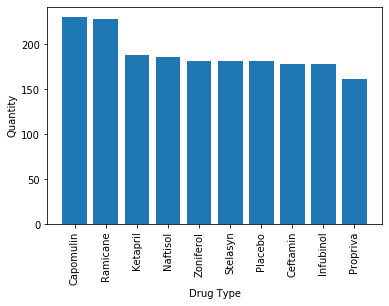

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
# Generate a bar plot using Matplotlib's `pyplot` that shows the number of data points for each treatment regimen.

drug_count = complete_data['Drug Regimen'].value_counts()
plt.bar(drug_count.index.values, drug_count.values)
plt.xticks(rotation=90)
plt.ylabel('Quantity')
plt.xlabel('Drug Type')
plt.show()

## Pie plots

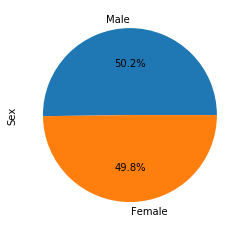

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mouse_gender_count = mouse_metadata['Sex'].value_counts()
#mouse_gender_count.plot(kind="pie")
mouse_gender_count.plot(kind="pie",autopct='%1.1f%%')
plt.show()


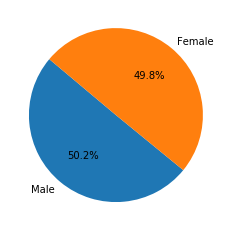

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male","Female"]
mouse_gender_count = mouse_metadata['Sex'].value_counts()
plt.pie(mouse_gender_count,autopct="%1.1f%%",labels=labels, startangle=140)
plt.show()


## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
#IQR = Interquartile Range
#top 4 treatments from graphs are capomulin, ceftamin, Infubinol and Ketapril

# set your treatment regimen variable and pull your complete data frame for "drug regimen" and the specific reviewed drugs
#https://www.geeksforgeeks.org/python-pandas-dataframe-isin/
treatment_regimen = complete_data[complete_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

#sort values from your drugs listed by time point
#https://stackoverflow.com/questions/56726676/how-does-pandas-sort-values-function-work-when-ascending
treatment_regimen = treatment_regimen.sort_values(["Timepoint"])

#redefine your treatment regimen with the column labels 
treatment_regimen_data = treatment_regimen[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

#table
treatment_regimen_data




,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,0,45.000000
221,Ceftamin,q483,0,45.000000
220,Ceftamin,o287,0,45.000000
219,Ceftamin,b487,0,45.000000
218,Ceftamin,p438,0,45.000000
...,...,...,...,...
1802,Infubinol,e476,45,62.435404
1804,Infubinol,a203,45,67.973419
1806,Infubinol,f345,45,60.918767
1810,Ceftamin,l471,45,67.748662


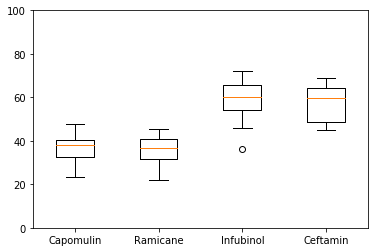

In [8]:
#Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#README: Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. 
treatment_regimen_sort = treatment_regimen_data.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
treatment_regimen_sort.head()

treatment_regimen_df = treatment_regimen_sort.to_frame()
treatment_regimen_df

four_drugs = ["Capomulin","Ramicane", "Infubinol", "Ceftamin"]

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#https://matplotlib.org/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.reset_index.html
boxplot_df = treatment_regimen_df.reset_index()

#group the information together by drug regimen and list the specific tumor volume 
lists = boxplot_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
list_df = pd.DataFrame(lists)

list_df = list_df.reindex(four_drugs)

tumor_volume = [vol for vol in list_df['Tumor Volume (mm3)']]

plt.boxplot(tumor_volume, labels=four_drugs)

plt.ylim(0, 100)

plt.show()

## Line and scatter plots

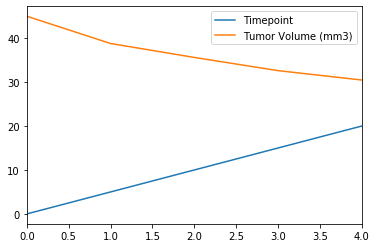

In [10]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#single mouse only - look for the specific ID mentioned within the merged data from csv files 
#https://www.geeksforgeeks.org/python-pandas-dataframe-isin/

single_mouse = complete_data[complete_data["Mouse ID"].isin(["f966"])]
single_mouse

# Extract the following columns: Mouse ID, Time Point and Tumor Volume (mm3)
time_versus_tumor = single_mouse[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
time_versus_tumor

#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.reset_index.html
reset_df = time_versus_tumor.reset_index()

line_plot = reset_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
line_plot

#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.line.html
#create your variable to print - use your isolated columns and plot the line 
lines = line_plot.plot.line()


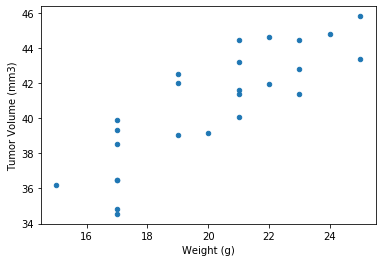

In [11]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_info = complete_data[complete_data["Drug Regimen"].isin(["Capomulin"])]
capomulin_info

capomulin_weight = capomulin_info.groupby("Mouse ID")["Weight (g)","Tumor Volume (mm3)"].mean()
capomulin_weight

scatter_plot = capomulin_weight.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)') 

In [12]:
weight = capomulin_info.iloc[:,7]
tum_vol = capomulin_info.iloc[:,3]
correlation = sp.pearsonr(weight,tum_vol)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.12


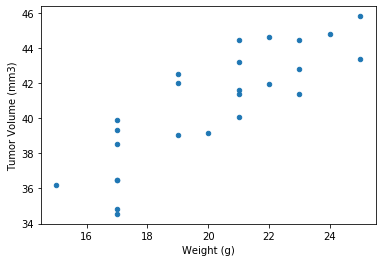

In [13]:
scatter_plot = capomulin_weight.plot(kind='scatter', x='Weight (g)', y = 'Tumor Volume (mm3)')

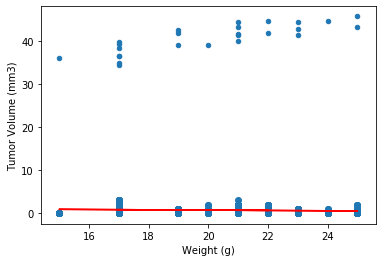

In [16]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

scatter_plot = capomulin_weight.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)')
x_values = weight
y_values = tum_vol
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.show()


In [15]:
capomulin_info.head(20)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
226,j246,0,45.0,0,Capomulin,Female,21,21
227,r554,0,45.0,0,Capomulin,Female,8,17
228,s185,0,45.0,0,Capomulin,Female,3,17
229,b742,0,45.0,0,Capomulin,Male,7,21
230,x401,0,45.0,0,Capomulin,Female,16,15
231,l509,0,45.0,0,Capomulin,Male,17,21
232,s710,0,45.0,0,Capomulin,Female,1,23
233,r157,0,45.0,0,Capomulin,Male,22,25
234,u364,0,45.0,0,Capomulin,Male,18,17
